# TP3 Audionumérique Parole et Musique (3IN ENSEEIHT)

**NOM** : MACHADO SANTOS ROHDE Pedro & ZAMBRANA PRADO Rodrigo

**Prénom** :

**Email** : pedro.machadosantosrohde@etu.enseeiht.fr & rodrigo.zambranaprado@etu.enseeiht.fr

Lien vers le support de cours : [cours.pdf](https://www.irit.fr/~Jerome.Farinas/M2N7/cours-3IN.expose.pdf)

Démonstration d'un système de reconnaissance de la parole End2End basé sur la plateforme ESPnet (plus d'infos ici : [https://espnet.github.io/espnet/notebook/asr_cli.html](https://espnet.github.io/espnet/notebook/asr_cli.html))


Configurez Notebook sur Python3 et GPU !

## Performance ASR

Sur des corpus libres, ESPnet arrive à ces résultats :

- Aishell (zh): CER test: 6.7%
- Common Voice (en): WER test: 2.3%
- LibriSpeech (en): WER test-clean: 2.6%, test-other 5.7%
- TED-LIUM2 (en): WER test: 8.1%

**Des modèles pré-entrainés sont disponibles :**

https://github.com/espnet/espnet#asr-results

# 1. Installation

ESPnet depend du toolkit Kaldi et Warp-CTC.

Vous pouvez le sinstaller à partir des sources avec :
```
$ cd espnet/tools; make
```

## 2.1 Installation (Google colab)

Dans Google colab, on peut utiliser des binaires pré-compilés pour accélérer le démarrage (3 min) :

In [0]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# espnet setup
!git clone --depth 5 https://github.com/espnet/espnet
!pip install -q torch==1.1
!cd espnet; pip install -q -e .

# download pre-compiled warp-ctc and kaldi tools
!espnet/utils/download_from_google_drive.sh \
    "https://drive.google.com/open?id=13Y4tSygc8WtqzvAVGK_vRV9GlV7TRC0w" espnet/tools tar.gz > /dev/null
!cd espnet/tools/warp-ctc/pytorch_binding && \
    pip install -U dist/warpctc_pytorch-0.1.1-cp36-cp36m-linux_x86_64.whl

# make dummy activate
!mkdir -p espnet/tools/venv/bin && touch espnet/tools/venv/bin/activate
!echo "setup done."

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git


NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.3_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.3)

# 2. Use ESPnet in Bash

- `espnet/egs/*/asr1/run.sh` est une recette qui marche directement
- Elle reproduit les résultats indiqués.
- Voici les différentes étapes :
![image.png](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/stages.png)

## 2.1 Structure de répertoire du style Kaldi

Chacune des recettes est accessible depuis :
`egs/xxx/asr1/run.sh`

Les répertoires les plus importants :

- `conf/`: configurations des étapes et outils de travail sur les serveurs (e.g., Local, SLURM, SGE)
- `data/`: raw [données préparées au format Kaldi](https://kaldi-asr.org/doc/data_prep.html) étapes 0 - 1
- `dump/`: données au format python (e.g., json, hdf5) à l'étape 2
- `exp/`: fichiers log et paramètres de modèles sauvegardés aux étapes 3 - 5



In [0]:
!tree -L 1 espnet/egs/librispeech/asr1

espnet/egs/librispeech/asr1 [error opening dir]

0 directories, 0 files



## 2.2 Préparation des données (Etapes 0 - 2)

En ajoutant `--stop-stage 2`, on peut arreter le script avant l'entrainement du réseau de neurones.

Ces étapes effectuent un calcul de paramètres utilisant des bandes de fréquences FBANK, et effectuent le formattage du texte.

![image.png](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/stages_prep.png)

In [0]:
!cd espnet/egs/an4/asr1; ./run.sh  --ngpu 1 --stop-stage 2

stage -1: Data Download
local/download_and_untar.sh: downloading data (64 MB) from http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz.
--2019-11-25 07:14:46--  http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz
Resolving www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)... 128.2.204.214
Connecting to www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)|128.2.204.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64327561 (61M) [application/x-gzip]
Saving to: 'an4_sphere.tar.gz'

an4_sphere.tar.gz   100%[===================>]  61.35M  16.9MB/s    in 4.0s    

2019-11-25 07:14:50 (15.4 MB/s) - 'an4_sphere.tar.gz' saved [64327561/64327561]

local/download_and_untar.sh: line 57: cd: ./downloads: No such file or directory
an4/
an4/README
an4/etc/
an4/etc/an4_test.fileids
an4/etc/an4.ug.lm
an4/etc/an4.ug.lm.DMP
an4/etc/an4_train.fileids
an4/etc/an4_train.transcription
an4/etc/an4_test.transcription
an4/etc/an4.dic
an4/etc/an4.phone
an4/etc/an4.filler
an4/

## Corpus JSON

L'étape 2 affiche le corpus de paramètres de parole et des paires de transcriptions au format JSON

In [0]:
!cat espnet/egs/an4/asr1/dump/train_dev/deltafalse/data.json

{
    "utts": {
        "fash-an251-b": {
            "input": [
                {
                    "feat": "/content/espnet/egs/an4/asr1/dump/train_dev/deltafalse/feats.1.ark:13",
                    "name": "input1",
                    "shape": [
                        98,
                        83
                    ]
                }
            ],
            "output": [
                {
                    "name": "target1",
                    "shape": [
                        3,
                        30
                    ],
                    "text": "YES",
                    "token": "Y E S",
                    "tokenid": "27 7 21"
                }
            ],
            "utt2spk": "fash"
        },
        "fash-an253-b": {
            "input": [
                {
                    "feat": "/content/espnet/egs/an4/asr1/dump/train_dev/deltafalse/feats.1.ark:8845",
                    "name": "input1",
                    "shape": [
                     

## 2.3 Apprentissage reseau de neurones (Etapes 3 - 4)

La configuration du reseau de neurones se fait dans le fichier `conf/train_xxx.yaml`

![image.png](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/stages_nn.png)

In [0]:
!tree espnet/egs/voxforge/asr1/conf

espnet/egs/voxforge/asr1/conf
├── decode.yaml -> tuning/decode_pytorch_transformer.yaml
├── fbank.conf
├── gpu.conf
├── pitch.conf
├── queue.conf
├── slurm.conf
├── train.yaml -> tuning/train_pytorch_transformer.yaml
└── tuning
    ├── decode_pytorch_transformer.yaml
    ├── decode_rnn.yaml
    ├── lm.yaml
    ├── train_pytorch_transformer_d6-2048.yaml
    ├── train_pytorch_transformer.yaml
    ├── train_rnn.yaml
    └── transducer
        ├── decode_transducer.yaml
        └── train_transducer.yaml

2 directories, 15 files


## paramètres d'entrainement de ESPnet

Il y a de nombreuses options ici : `espnet/espnet/bin/asr_train.py`

- NN backends: pytorch, chainer
- Predefined models
  - RNN (LSTM, GRU, VGG, etc) with Attention + CTC (dot, location, multi-head, etc)
  - Transformer + CTC
  - RNN Transducer with Attention
- Speech enhancement (joint training):
  - beamformer
  - dereverb (WPE, DNN-WPE)
  - speech separation
- Data augmentation: SpecAugment, speed perturbation, etc
- Minibatch strategy
  - sorting, category, counting (tensor elements, sequence frames, sequences)
- Multi GPU training
- Half/mixed precision training
- Regularizations: dropout, label smoothing, weight noise, weight decay, etc

## Training config: RNN with Attention + CTC

- mtlalpha: 0.0 (attention), 0.5 (CTC/attention), 1.0 (CTC)
- complete list of common options https://espnet.github.io/espnet/apis/espnet_bin.html#Named%20Arguments
- complete list of model-specific options https://espnet.github.io/espnet/_modules/espnet/nets/pytorch_backend/e2e_asr.html#E2E.add_arguments

In [0]:
!cat espnet/egs/an4/asr1/conf/train_mtlalpha0.5.yaml

# minibatch related
batch-size: 30
maxlen-in: 800  # if input length  > maxlen_in, batchsize is automatically reduced
maxlen-out: 150 # if output length > maxlen_out, batchsize is automatically reduced
# optimization related
sortagrad: 0 # Feed samples from shortest to longest ; -1: enabled for all epochs, 0: disabled, other: enabled for 'other' epochs
opt: adadelta
epochs: 20
patience: 3

# scheduled sampling option
sampling-probability: 0.0

# encoder related
etype: blstmp     # encoder architecture type
elayers: 4
eunits: 320
eprojs: 320
subsample: "1_2_2_1_1" # skip every n frame from input to nth layers
# decoder related
dlayers: 1
dunits: 300
# attention related
atype: location
adim: 320
aconv-chans: 10
aconv-filts: 100

# hybrid CTC/attention
mtlalpha: 0.5


## Training config: Transformer + CTC

- `--model-module <module>:<class>` to select non-default model implementation
- differences from RNN: minibatch strategy, optimizer setting, etc
- complete list of model-specific options https://espnet.github.io/espnet/_modules/espnet/nets/pytorch_backend/e2e_asr_transformer.html#E2E.add_arguments

In [0]:
!cat espnet/egs/librispeech/asr1/conf/tuning/train_pytorch_transformer_large_ngpu4.yaml

# This configuration requires 4 gpus with 12GB memory
accum-grad: 4
adim: 512
aheads: 8
backend: pytorch
batch-bins: 15000000
dlayers: 6
dropout-rate: 0.1
dunits: 2048
elayers: 12
epochs: 120
eunits: 2048
grad-clip: 5
lsm-weight: 0.1
model-module: espnet.nets.pytorch_backend.e2e_asr_transformer:E2E
mtlalpha: 0.3
opt: noam
patience: 0
sortagrad: 0
transformer-attn-dropout-rate: 0.0
transformer-init: pytorch
transformer-input-layer: conv2d
transformer-length-normalized-loss: false
transformer-lr: 10.0
transformer-warmup-steps: 25000


## Training config: RNN Transducer (with Attention)

- `--model-module <module>:<class>` to select non-default model implementation
- differences from RNN: joint network, optimizer setting, etc
- complete list of model-specific options https://espnet.github.io/espnet/_modules/espnet/nets/pytorch_backend/e2e_asr_transducer.html#E2E.add_arguments

In [0]:
!cat espnet/egs/voxforge/asr1/conf/tuning/train_pytorch_transformer_d6-2048.yaml

# network architecture
# encoder related
transformer-input-layer: conv2d
elayers: 12
eunits: 2048
# decoder related
dlayers: 6
dunits: 2048
# attention related
adim: 256
aheads: 4
# transformer related
model-module: "espnet.nets.pytorch_backend.e2e_asr_transformer:E2E"

# hybrid CTC/attention
mtlalpha: 0.3

# label smoothing
lsm-type: unigram
lsm-weight: 0.1

# minibatch related
batch-size: 64
maxlen-in: 512  # if input length  > maxlen_in, batchsize is automatically reduced
maxlen-out: 150 # if output length > maxlen_out, batchsize is automatically reduced

# optimization related
sortagrad: 0 # Feed samples from shortest to longest ; -1: enabled for all epochs, 0: disabled, other: enabled for 'other' epochs
opt: noam
epochs: 200
dropout-rate: 0.1
accum-grad: 2
grad-clip: 5
patience: 0
transformer-lr: 10.0
transformer-warmup-steps: 25000
transformer-attn-dropout-rate: 0.0
transformer-length-normalized-loss: False
transformer-init: pytorch

# scheduled sampling option
sampling-probabili

### Run LM and ASR NN training

RNNLM and RNN with attention and CTC in AN4

In [0]:
# WARNING: This code takes several minutes!
!cd espnet/egs/an4/asr1; ./run.sh  --ngpu 1 --stage 3 --stop-stage 4 --train-config ./conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 3: LM Preparation
stage 4: Network Training


### TIPS 1/3: change_yaml.py

Tweak training config. for example:  **--train-config $(change_yaml.py train.yaml -a lr=10.0)**

- creates the config with new name: `train_lr10.0.yaml`
- exp results are stored in dir: `exp/train_lr10.0/results`
- useful hyperparameter search by array jobs

In [0]:
# WARNING: This code takes several minutes!
!cd espnet/egs/an4/asr1; source path.sh; \
  ./run.sh  --ngpu 1 --stage 4 --stop-stage 4 \
  --train-config $(change_yaml.py ./conf/train_mtlalpha0.5.yaml -a eunits=100 -a epochs=5)

dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Network Training


### TIPS 2/3: tensorboard

To find the best config, view tensorboard

In [0]:
!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
%load_ext tensorboard 
%tensorboard --logdir espnet/egs/an4/asr1/tensorboard

     |████████████████████████████████| 95.2MB 101kB/s 
     |████████████████████████████████| 3.8MB 49.7MB/s 
     |████████████████████████████████| 450kB 47.1MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
ERROR: tb-nightly 2.1.0a20191124 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 59, in run_main
    default.get_plugins() + default.get_dynamic_plugins(),
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/default.py", line 115, in get_dynamic_plugins
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/default.py", line 115, in <listcomp>
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "/usr/local/lib/python3.6/dist-packages/pkg_resources/__init__.py", line 2442, in load
    self.require(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pkg_resources/__init__.py", line 2465, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  Fil

![image.png](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/tb.png)

### TIPS 3/3 log files

To monitor training, `exp/train*/results/` contains useful files:

- `loss.png` train/valid loss values
- `acc.png` train/valid accuracy
- `cer.png` train/valid character error rate
- `att_ws/*.png` attention plots

loss.png


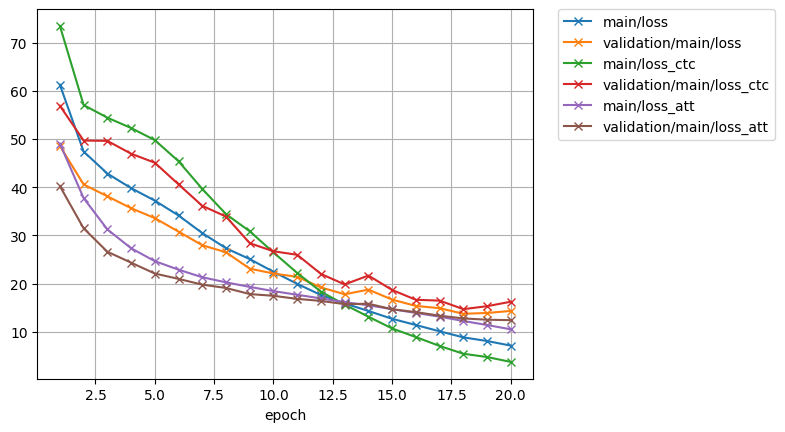

acc.png


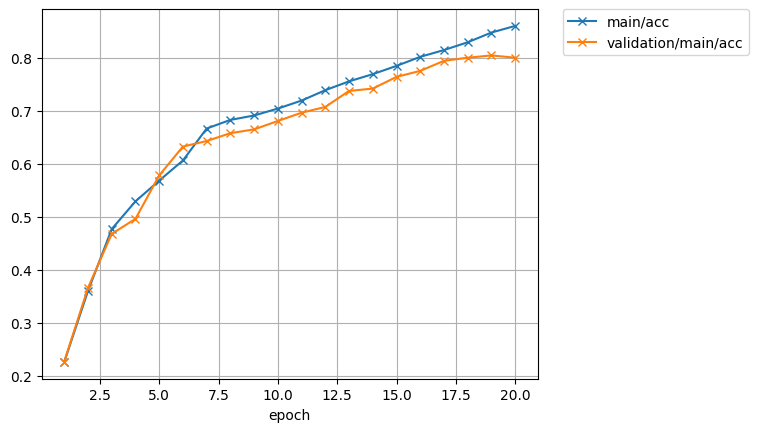

cer.png


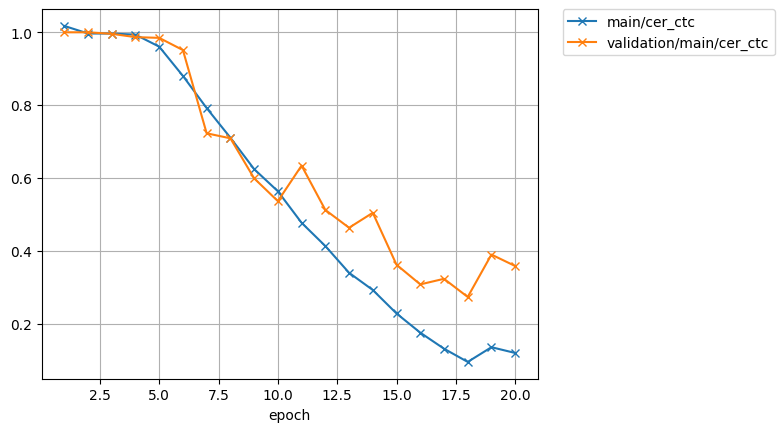

In [0]:
import glob
from IPython.display import Image, display_png
expdir = "espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/results/"
for name in ["loss.png", "acc.png", "cer.png"]:
    print(name)
    display_png(Image(expdir + name, width=500))

### Attention plots (RNN)

A diagonal attention is good measure to check training in ASR

<table>
<tr>
    <td><img src="https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/4k0c0302.ep.1.png"></td>
    <td><img src="https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/4k0c0302.ep.15.png"></td>
</tr>
</table>
RNN attentions at the first (left) and last (right) epoch

### Attention plots (Transformer)

Transformer has many attentions. We recommend to monitor the last decoder layer's attention to encoded features.

![trnf-attn](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/4k0c0302.decoder.decoders.5.src_attn.ep.100.png)

Transformer multi (=4) head attention plot in the last decoder layer at the last epoch

### Attention plots (Transformer)

Transformer has many attentions. We recommend to monitor the last decoder layer's attention to encoded features.

![trnf-attn](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/4k0c0302.decoder.decoders.0.src_attn.ep.100.png)

Transformer multi (=4) head attention plot in the first decoder layer at the last epoch

## 3.4 Decoding and evaluation (Stage 5)

The last stage of ASR recipe

![image.png](https://gitlab.com/jeromefarinas/tp-3en-n7/raw/master/images/stages_eval.png)

### decoding YAML config

very similar to training YAML

- decoding score: 

$\mathrm{argmax}_y (1 - \lambda) \log P_{dec}(y|x) + \lambda \log P_{ctc}(y|x) + \gamma \log P_{lm}(y) + b |y|$

In [0]:
!cat espnet/egs/an4/asr1/conf/decode_ctcweight0.5.yaml

# decoding parameter
beam-size: 20
penalty: 0.0
maxlenratio: 0.0
minlenratio: 0.0
ctc-weight: 0.5
lm-weight: 1.0


### Run ASR decoding

In [0]:
# WARNING: This code takes several minutes!
!cd espnet/egs/an4/asr1; source path.sh; \
  ./run.sh --stage 5 --decode-config $(change_yaml.py conf/decode_ctcweight0.5.yaml -a batchsize=0) --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 5: Decoding
2019-11-25 07:38:20,750 (splitjson:40) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/train_dev/deltafalse/data.json
2019-11-25 07:38:20,751 (splitjson:40) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/test/deltafalse/data.json
2019-11-25 07:38:20,752 (splitjson:52) INFO: number of utterances = 100
2019-11-25 07:38:20,753 (splitjson:52) INFO: number of utterances = 130
2019-11-25 07:51:04,792 (concatjson:36) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/concatjson.py exp/train_nodev_pytorch_train_mtlalpha0.5/decode_train_dev_decode_ctcweight0.5_batchsize0_lm_word100/data.1.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_train_dev_decode_ctcweight0.5_batchsize0_lm_word100/data.2.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_train_dev_decode_ctcweight0.5_batchsize0_lm_word100/data.3.json exp

## 3.5 Check evaluation results

ESPnet uses `sclite` in SPTK to evaluate ASR errors

- token error rate: exp/(train dir)/(decode dir)/result.txt
- word error rate: exp/(train dir)/(decode dir)/result.wrd.txt

In [0]:
!ls espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/*/result.txt | xargs -n1 grep -e Avg -e SPK -m 2

|   SPKR     |   # Snt      # Wrd   |   Corr        Sub         Del        Ins        Err       S.Err   |
|   Sum/Avg  |    130        2565   |   88.1        6.0         5.9        1.1       12.9        59.2   |
|   SPKR      |   # Snt      # Wrd    |   Corr         Sub        Del         Ins         Err       S.Err    |
|   Sum/Avg   |    100        1915    |   81.4         7.2       11.4         1.2        19.8        68.0    |


In [0]:
!head -n 36 espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_batchsize0_lm_word100/result.txt




                     SYSTEM SUMMARY PERCENTAGES by SPEAKER                      

,-------------------------------------------------------------------------------------------------------.
|exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_batchsize0_lm_word100/hyp.trn|
|-------------------------------------------------------------------------------------------------------|
|   SPKR     |   # Snt      # Wrd   |   Corr        Sub         Del        Ins        Err       S.Err   |
|------------+----------------------+-------------------------------------------------------------------|
|   fcaw     |     13         237   |   88.6        8.4         3.0        0.8       12.2        53.8   |
|------------+----------------------+-------------------------------------------------------------------|
|   fjlp     |     13         242   |   93.8        3.3         2.9        0.0        6.2        53.8   |
|------------+----------------------+------------------------------

In [0]:
!tail -n 7 espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_batchsize0_lm_word100/result.txt

id: (mmxg-mmxg-cen8-b)
Scores: (#C #S #D #I) 26 2 8 0
REF:  O C t O B e r <space> t w e n t y <space> f o u r <space> n i n E T E e N <space> s e v e n T Y 
HYP:  E N t * * e r <space> t w e n t y <space> f o u r <space> n i n * * * e * <space> s e v e n * * 
Eval: S S   D D                                                       D D D   D                   D D 




### ASR result as `data.json`

Find detail results in `exp/xxx/decode_yyy/data.json`

In [0]:
!head -n30 espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_batchsize0_lm_word100/data.json

{
    "utts": {
        "fcaw-an406-b": {
            "output": [
                {
                    "name": "target1[1]",
                    "rec_text": "RUBOUT T N E N TWO NINE<eos>",
                    "rec_token": "R U B O U T <space> T <space> N <space> E <space> N <space> T W O <space> N I N E <eos>",
                    "rec_tokenid": "20 23 4 17 23 22 2 22 2 16 2 7 2 16 2 22 25 17 2 16 11 16 7 29",
                    "score": -42.14973831176758,
                    "shape": [
                        25,
                        30
                    ],
                    "text": "RUBOUT G M E F THREE NINE",
                    "token": "R U B O U T <space> G <space> M <space> E <space> F <space> T H R E E <space> N I N E",
                    "tokenid": "20 23 4 17 23 22 2 9 2 15 2 7 2 8 2 22 10 20 7 7 2 16 11 16 7"
                }
            ],
            "utt2spk": "fcaw"
        },
        "fcaw-an407-b": {
            "output": [
                {
               

# 3. Utiliser ESPnet en Python

1. Charger les paramètres de la parole
2. Charger les modèles pré-entrainés
3. Reconnaitre la parole par le modèle
4. Visualisations (attention, ctc)

### 3.1 Charger les paramètres de la parole

Text(0.5, 1.05, 'fcaw-cen6-b: ONE FIVE TWO THREE SIX')

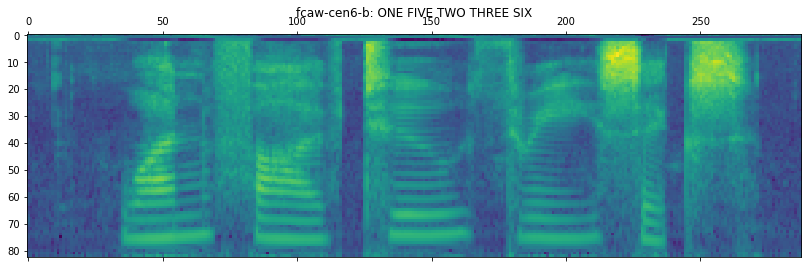

In [0]:
import os
os.chdir('/content')

%matplotlib inline
import json
import matplotlib.pyplot as plt
import kaldiio

# ESPnet summarizes dataset to JSON
root = "espnet/egs/an4/asr1"
with open(root + "/dump/test/deltafalse/data.json", "r") as f:
    test_json = json.load(f)["utts"]

key, info = list(test_json.items())[10]
fbank = kaldiio.load_mat(info["input"][0]["feat"])

# plot the speech feature
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

## 3.2 Charger les modèles pré-entrainés

Des configurations de modèles pré-entrainés (JSON) et des captures (pickle) sont disponibles dans `exp/train_xxx/results`

In [0]:
!ls egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5_eunits100_epochs5/results

ls: cannot access 'egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5_eunits100_epochs5/results': No such file or directory


## 3.2 Charger un modèle pré-entrainé

chargeons-le à partir de python

In [0]:
import os
os.chdir('/content/espnet')

import json
import torch
from espnet.nets.pytorch_backend.e2e_asr import E2E

model_dir = "egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha0.5/results"

# load model
with open(model_dir + "/model.json", "r") as f:
    idim, odim, conf = json.load(f)
model = E2E.build(idim, odim, **conf)
model.load_state_dict(torch.load(model_dir + "/model.acc.best"))
model.cpu().eval()
vocab = conf["char_list"]
print(vocab)
model

['<blank>', '<unk>', '<space>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '<eos>']


E2E(
  (enc): Encoder(
    (enc): ModuleList(
      (0): RNNP(
        (birnn0): LSTM(83, 320, batch_first=True, bidirectional=True)
        (bt0): Linear(in_features=640, out_features=320, bias=True)
        (birnn1): LSTM(320, 320, batch_first=True, bidirectional=True)
        (bt1): Linear(in_features=640, out_features=320, bias=True)
        (birnn2): LSTM(320, 320, batch_first=True, bidirectional=True)
        (bt2): Linear(in_features=640, out_features=320, bias=True)
        (birnn3): LSTM(320, 320, batch_first=True, bidirectional=True)
        (bt3): Linear(in_features=640, out_features=320, bias=True)
      )
    )
  )
  (ctc): CTC(
    (ctc_lo): Linear(in_features=320, out_features=30, bias=True)
    (ctc_loss): CTCLoss()
  )
  (att): ModuleList(
    (0): AttLoc(
      (mlp_enc): Linear(in_features=320, out_features=320, bias=True)
      (mlp_dec): Linear(in_features=300, out_features=320, bias=False)
      (mlp_att): Linear(in_features=10, out_features=320, bias=False)
     

## 3.3 Reconnaitre la parole par le modèle

Vous pouvez effectuer un décodage avec tous les modèles (S2S, CTC, LM, etc.) dans ESPnet.

In [0]:
import re
from espnet.nets.beam_search import BeamSearch

key, info = list(test_json.items())[10]
fbank = kaldiio.load_mat(info["input"][0]["feat"])

# setup beam search
bs = BeamSearch(
    scorers=model.scorers(), weights={"decoder": 0.5, "ctc": 0.5},
    sos=model.sos, eos=model.eos,
    beam_size=2, vocab_size=len(vocab))
# GPU decoding: model.cuda(), bs.cuda()
with torch.no_grad():
    encoded = model.encode(torch.as_tensor(fbank))
    result = bs(encoded)  # get N-best results

print("groundtruth:", info["output"][0]["text"])
print("N-best list:")
for n, hyp in enumerate(result, 1):
    text = "".join(vocab[y] for y in hyp.yseq).replace("<space>", " ").replace("<eos>", "")
    scores = {k: f"{float(v):0.3f}" for k, v in hyp.scores.items()}
    print(f"{n}: {text}, score: {scores}")

groundtruth: ONE FIVE TWO THREE SIX
N-best list:
1: ONE FIVE TWO THREE SIX, score: {'decoder': '-4.693', 'ctc': '-0.009'}
2: ONE FIVE TWO THRE SIX, score: {'decoder': '-9.203', 'ctc': '-0.009'}
3: ONE FIVE TWO THREE SIXT, score: {'decoder': '-10.860', 'ctc': '-0.059'}
4: ONE FIVE TWO THREE SIXTY, score: {'decoder': '-8.361', 'ctc': '-0.001'}
5: ONE FIVE TWO THREE SIXTY O, score: {'decoder': '-13.908', 'ctc': '-0.000'}
6: ONE FIVE TWO THREE SIXTY THO, score: {'decoder': '-14.060', 'ctc': '-0.000'}
7: ONE FIVE TWO THREE SIXTY THR, score: {'decoder': '-15.245', 'ctc': '-0.000'}


## 3.4 Visualisations

Voyons les entrailles du réseau de neuronnes avec Python :

- Matrices de l'attention entre l'encodeur et le décodeur
- Probabilités à poseriori du CTC

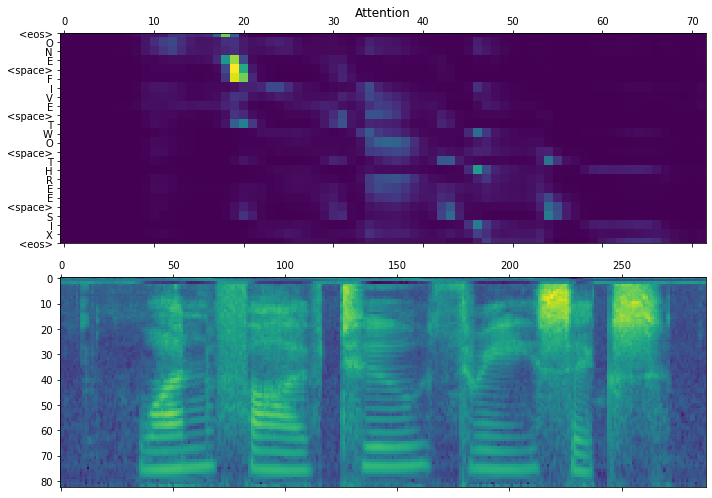

In [0]:
# Attention plot
x = torch.as_tensor(fbank).unsqueeze(0)
y = result[0].yseq.unsqueeze(0)
attn = model.calculate_all_attentions(x, [len(fbank)], y)[0]

# plot
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].set_title("Attention")
ax[0].matshow(attn, aspect="auto")
txt = [vocab[int(i)] for i in y[0]]
ax[0].set_yticks(range(len(txt)))
ax[0].set_yticklabels(txt)
ax[1].matshow(fbank.T[::-1], aspect="auto")
fig.tight_layout()

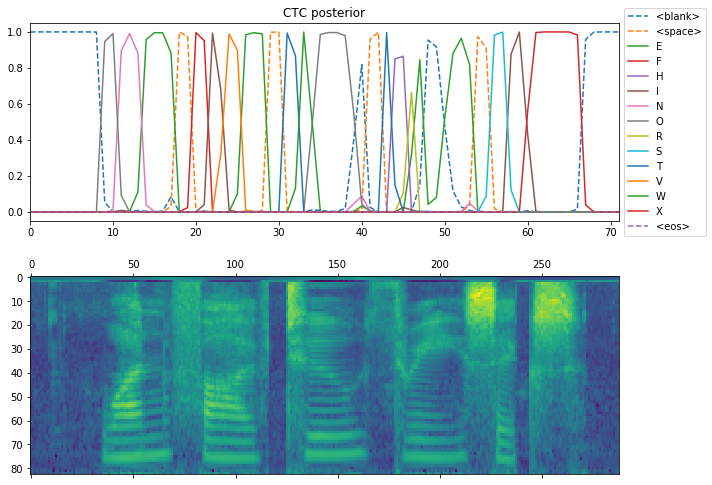

In [0]:
# CTC posterior plot
with torch.no_grad():
    logp = model.ctc.log_softmax(encoded.unsqueeze(0))[0]
    prob = logp.exp_().numpy()

fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].set_title("CTC posterior")
vs = set(int(y) for y in result[0].yseq)
vs.add(0)
for n, i in enumerate(vs):
    v = vocab[i]
    ax[0].plot(prob[:, i], label=v, linestyle="-" if len(v) == 1 else "--")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_xlim(0, len(encoded)-1)
ax[1].matshow(fbank.T[::-1], aspect="auto")
fig.tight_layout()

###Annexe

In [0]:
# exemple audio de AN4
import os
import kaldiio
from IPython.display import Audio


try:
  d = os.getcwd()
  os.chdir(root)
  sr, wav = kaldiio.load_scp("data/test/wav.scp")[key]
finally:
  os.chdir(d)
Audio(wav, rate=sr)

FileNotFoundError: ignored

Exercice :
Testez un modèle pré-appris sur AN4 sur un de vos fichiers.

Cf. documentation [https://espnet.github.io/espnet/index.html](https://espnet.github.io/espnet/index.html)


### Questions :

1.   En quoi consiste le corpus AN4 ? (types de phrases, quantité de corpus disponible)

C'est une base de données alphanumérique, avec des enregistrements de, pas exactement des phrases d type sujet, verbe et complément, mais putôt d'informations personnelles comme, nom, adresse, numéro télphonique, mais aussi des séquences alétoires de mots. Lo corpus est constitué de 948 données d'entrainement et 130 de test (originalement il y en avait plus mais les données sensibles (même si censées d'être fausses) ont été éliminées par sécurité).

2.   Qu'est-ce que FBANK ? L'échelle MEL est-elle employée ?

FBANK est un banc de filtres, utilisé pour convertir l'information fréquentielle pour imiter l'audition humaine. Ce sont des filtres triangulaires, qui transforment le spectre de puissance de la DFT en Hertz à un spectre de puissance à l'échelle MEL.

3.   Qu'est ce que le WER et CER ? Quelle est la formule de calcul ?

WER : Word Error Rate
WER = (S+D+I)/(S+D+C), où S est le nombre de mots substitués, D le nombre de mots omis, I le nombre de mots insérés et C le nombre de mots correctement identifiés.

CER : Character Error Rate, même formule que pour le WER, mais relative aux charactères

4.   Qu'est-ce qu'un modèle transformer ? C'est à base de quel type de réseaux de neuronnes ?

C'est un modèle basé sur les CNN qui utilise également un modèle de l'Attention pour aller plus vite. 

5.   Qu'est-ce qu'un modèle de l'attention ?

Dans le modèle de l'attention, on idéntifie les bouts de l'entrée qui sont relevants pour chaque mot en sortie, en déduisant donc un contexte pour ce mot. Ce contexte est utilisé pour calculer la sortie du RNN. Pour un mot de la sortie, on peut donc avoir l'influence de plusieurs bouts de l'audio en entrée.

6.   Qu'est-ce qu'un transducteur ? (pour la parole)

Le transducteur prend un (ou plusieurs) mots de l'entrée et le transforme en un (ou plusieurs) mots de la sortie. Dans un contexte de reconnaissance de la parole, un transducteur prendrait un bout d'audio de parole, avec plusieurs phonèmes, et le transformerait dans un mot (ou plusieurs).

7.   Qu'est-ce qu'un système de bout en bout (End-2-End) en reconnaissance de la parole ?

Un système end-2-end est un système entier en soi-même, qui prend un audio en entrée et sort directement le texte reconnu. On n'a pas besoin d'entraîner des modèles différents pour l'acoustique, le langage et la prononciation, tout est déjà intégré dans le système end-2-end, ce qui facilite l'entraînement.

